# Image Splitting

We will work on splitting an image into each part of the image.

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow import image

import itertools

tf.random.set_seed(1)

In [3]:
img  = Image.open('../171.png').convert('L')

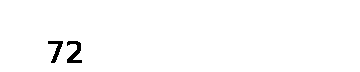

In [4]:
img

In [5]:
box = (45, 30, 85,65)
img = img.crop(box)

In [6]:
img = np.array(img)

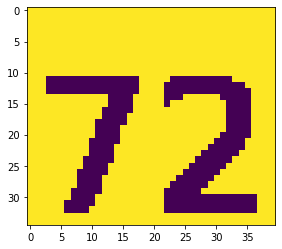

In [7]:
plt.imshow(img)

In [8]:
img = img/255
img = 1- img
img = img.astype('int')

### This finds where the image should be split. The average list it returns shows every column where that row thinks it should split.

In [10]:
avglist = []
first_object = 0
second_object = 0
for col in range(img.shape[1]-1):
    for row in range(img.shape[0]):
        if img[row][col] > 0:
            if img[row][col+1] == 0:
                first_object = col
            if img[row][col-1] == 0:
                second_object = col
    avg = (second_object-first_object)/2 + first_object
    if avg != 0:
        avglist.append(avg)


In [11]:
avg = round(sum(avglist)/len(avglist))
avg

19

### This is where the image is actually split.

In [12]:
firstimg = np.zeros((35,avg))
secondimg = np.zeros((35,img.shape[1]-avg))
for i in range(0,35):
    firstimg[i] = img[i][:avg]
    secondimg[i] = img[i][avg:]

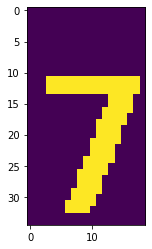

In [13]:
plt.imshow(firstimg)

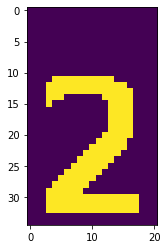

In [14]:
plt.imshow(secondimg)